In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from models.model_fpgan import FPGANSynthesizer
from models.model_ctgan import CTGANSynthesizer
from models.model_dpctgan import DPCTGANSynthesizer

import ctgan
from sklearn.model_selection import train_test_split
from utils.privacy import normalized_avg_dist
from utils.fidelity import get_predictions, eval_fidelity, get_accuracy, get_roc_auc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("D:/Datasets/fetal_health/fetal_health.csv")

data.fetal_health = data.fetal_health.replace(1, 0)
data.fetal_health = data.fetal_health.replace(2, 1)
data.fetal_health = data.fetal_health.replace(3, 1)

data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0


In [4]:
data.shape

(2126, 22)

In [5]:
#normalized_data=(data-data.mean())/data.std()
data=(data-data.min())/(data.max()-data.min())

In [6]:
target = 'fetal_health'

In [7]:
X = data.drop(columns=[target])
y = data[target]

In [8]:
y_series = pd.Series(y)

# Calculate the class distribution
class_distribution = y_series.value_counts(normalize=True) * 100

print(class_distribution)

0.0    77.84572
1.0    22.15428
Name: fetal_health, dtype: float64


In [8]:
#model_ctgan = CTGANSynthesizer(epochs=200, verbose=True)
#model_ctgan = DPCTGANSynthesizer(verbose=True)
model_ctgan = FPGANSynthesizer(epochs=200, verbose=True)
#original_losses, tranformed_privacies, losses = model_ctgan.fit(data)
model_ctgan.fit(data, rate=0.35)

Epoch 1, Loss G: -0.2576,Loss D: -0.1004
Epoch 2, Loss G: -0.2489,Loss D: -0.4106
Epoch 3, Loss G: -0.2267,Loss D: -1.0104
Epoch 4, Loss G: -0.2201,Loss D: -1.4763
Epoch 5, Loss G: -0.2721,Loss D: -1.5370
Epoch 6, Loss G: -0.3342,Loss D: -0.7677
Epoch 7, Loss G: -0.3651,Loss D: -0.4502
Epoch 8, Loss G: -0.3818,Loss D: -0.6022
Epoch 9, Loss G: -0.3615,Loss D: -0.8496
Epoch 10, Loss G: -0.3582,Loss D: -0.6660
Epoch 11, Loss G: -0.3474,Loss D: -0.2131
Epoch 12, Loss G: -0.3663,Loss D: -0.0190
Epoch 13, Loss G: -0.3854,Loss D:  0.3563
Epoch 14, Loss G: -0.4127,Loss D:  0.6509
Epoch 15, Loss G: -0.4238,Loss D:  0.6485
Epoch 16, Loss G: -0.3701,Loss D:  0.0121
Epoch 17, Loss G: -0.3003,Loss D: -0.5232
Epoch 18, Loss G: -0.2466,Loss D: -1.2238
Epoch 19, Loss G: -0.1953,Loss D: -1.5649
Epoch 20, Loss G: -0.1506,Loss D: -1.7935
Epoch 21, Loss G: -0.1613,Loss D: -1.2234
Epoch 22, Loss G: -0.1847,Loss D: -0.5172
Epoch 23, Loss G: -0.2423,Loss D:  0.2972
Epoch 24, Loss G: -0.2649,Loss D:  0.6100
E

([array(-0.00402469, dtype=float32),
  array(0.00236836, dtype=float32),
  array(0.01158878, dtype=float32),
  array(0.01201899, dtype=float32),
  array(0.02378012, dtype=float32),
  array(0.0327393, dtype=float32),
  array(0.04267673, dtype=float32),
  array(0.05656345, dtype=float32),
  array(0.07084729, dtype=float32),
  array(0.08318422, dtype=float32),
  array(0.10945831, dtype=float32),
  array(0.12115207, dtype=float32),
  array(0.13963376, dtype=float32),
  array(0.13637754, dtype=float32),
  array(0.1265887, dtype=float32),
  array(0.12399957, dtype=float32),
  array(0.09880108, dtype=float32),
  array(0.0597201, dtype=float32),
  array(0.04282277, dtype=float32),
  array(-0.0403499, dtype=float32),
  array(-0.11119478, dtype=float32),
  array(-0.12080257, dtype=float32),
  array(-0.1915119, dtype=float32),
  array(-0.22788432, dtype=float32),
  array(-0.26427978, dtype=float32),
  array(-0.32723263, dtype=float32),
  array(-0.32539344, dtype=float32),
  array(-0.3247394, dtyp

In [9]:
from utils.utils import save_models
save_models(model_ctgan, '035fpgan200', 'fetal_health')

In [10]:
from utils.utils import load_models
model_ctgan = load_models('035fpgan200', 'fetal_health')

In [21]:
samples = model_ctgan.sample(len(data))  # Synthetic copy
samples.dropna(how='any', inplace=True)

X_syn = samples.drop(columns=[target])
y_syn = samples[target]
y_syn = y_syn.round(0)
y_syn = y_syn.astype(int)

## Privacy

In [22]:
samples = samples.apply(pd.to_numeric) # convert all columns of DataFrame
data = data.apply(pd.to_numeric) # convert all columns of DataFrame
samples = samples[:2000]
data = data[:2000]

In [23]:
normalized_avg_distance = normalized_avg_dist(samples, data)
print(normalized_avg_distance)

[0.19314022]


## Fidelity

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3, random_state=42, stratify=y_syn)

rr_pred = []
fr_pred = []
ff_pred = []
rf_pred = []

rr_pred = get_predictions(X_train, y_train, X_test, y_test)
fr_pred = get_predictions(X_syn_train, y_syn_train, X_test, y_test)

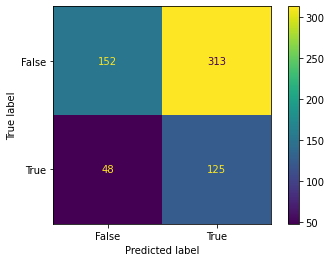

In [25]:
from sklearn import metrics
def print_confusion_matrix(rr_pred, fr_pred):
    confusion_matrix = metrics.confusion_matrix(rr_pred, fr_pred)

    cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display1.plot()
    plt.show()
    
print_confusion_matrix(rr_pred, fr_pred)

In [26]:
percentage = eval_fidelity(rr_pred, fr_pred)

In [27]:
rr_acc = get_accuracy(y_test, rr_pred)
fr_acc = get_accuracy(y_test, fr_pred)
print("Accuracy of real data: ", rr_acc)
print("Accuracy of synthetic data: ", fr_acc)

Accuracy of real data:  0.9278996865203761
Accuracy of synthetic data:  0.40282131661442006


In [28]:
rr_score = get_roc_auc(y_test, rr_pred)
fr_score = get_roc_auc(y_test, fr_pred)
print("ROC AUC of real data: ", rr_score)
print("ROC AUC of synthetic data: ", fr_score)

ROC AUC of real data:  0.93594189248969
ROC AUC of synthetic data:  0.510017552121238


In [29]:
#print(class1_ratio, class2_ratio)

## Final plot

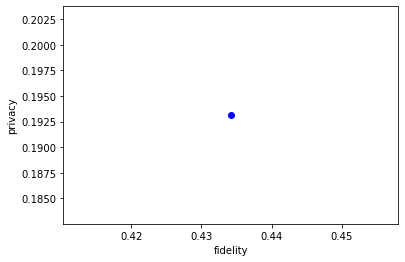

0.4341692789968652 [0.19314022]


In [30]:
plt.scatter(percentage, normalized_avg_distance, c ="blue")
plt.xlabel("fidelity")
plt.ylabel("privacy")
plt.show()
print(percentage, normalized_avg_distance)